### T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 
1. one sampled t-test: whether means of the sample and the population are different
2. two-sampled t-test:

## One Sample T-Test

<img src="https://dataanalyze.files.wordpress.com/2017/05/t-test.jpg?w=700"/>

In [1]:
import scipy.stats as stats

In [2]:
## Class of students with certain age

ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [3]:
## total number of students are:

len(ages)

32

In [4]:
## now calculate the mean

import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [5]:
## Lets take sample of ages out of the list
## here we will select 10 random ages for this we are using np.random.choice()

sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [6]:
age_sample

array([32, 55, 28, 27, 50, 14, 35, 30, 16, 25])

Now if we compute a Mean of this then will there be any significant difference between the Mean of the sample and the total population ?

For this we need to use the One Sample T-Test.

Here,
 - Null Hypothesis =  There will be no difference. 
 - Alternate Hypothesis = There will be difference.

Now we will use the One Sample T-Test to compute the P-value.
If the P-value is less than 0.05 then we will reject the Null Hypothesis and the Alternate Hypothesis gets accepted.

For One Sample T-Test we use <b>ttest_1samp</b>

In [7]:
## now to do this we need to import a function from scipy library

from scipy.stats import ttest_1samp

It will basically give 2 values:
 - ttest = statistics T Test value.
 - p_value = the P-value.(important)

In [8]:
## here we are comparing the mean of the age sample with the population mean i.e. 30
## so it will say whether the sample mean is 30 or not

ttest,p_value=ttest_1samp(age_sample,30)

In [9]:
## checking the p_value

print(p_value)

0.7775862816704472


In [10]:
## now creating a if-else statement to prove the Hypothesis
## so now we will check whether the P-value is less than 0.05 or not

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### Some More Examples
Consider the age of students in a college and in Class A

The total students in the college is 1500. So we are using poison distribution saying that the age in that college starts from 18 and the Mean is 35. loc= most left value and mu=Mean.

Again same logic is applied for Class A here the Mean is 30 and sample size is 60.

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)   
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [12]:
## here is the actual Mean of Class A ages

classA_ages.mean()

46.9

Now again we will use the One Sample T-Test.

In [13]:
## here the population mean is the Mean of school_ages
## ttest_1samp() = Calculate the T-test for the mean of ONE group of scores.

_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [14]:
## the actual Mean of the population is

school_ages.mean()

53.303333333333335

In [15]:
## now checking the P-value

p_value

1.139027071016194e-13

In [16]:
## now as the P-value is smaller than 0.05
## Null Hypothesis = There will be no difference.
## Alternate Hypothesis = There will be difference.

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

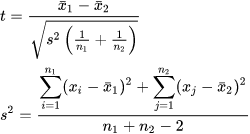

Here we will have 2 independent groups, so here we need to compare the mean of these 2 independent groups in order to determine whether there is a statistical evidence that the associated population means are significantly different.


Using np.random.seed(number) has been a best practice when using NumPy to create reproducible work. Setting the random seed means that your work is reproducible to others who use your code.

The problem comes in larger projects or projects with imports which could also set the seed; using np.random.seed(number) sets what NumPy calls the global random seed — affecting all uses to the np.random.* module. Some imported packages or other scripts could reset the global random seed to another random seed with np.random.seed(another_number), leading to undesirable changes to your output and your results not being reproducible. For the most part, you will only need to ensure that you use the same random numbers for specific parts of your code (like tests or functions).

Solution:

np.random.RandomState()

In [17]:
## taking 2 independent groups as ClassA_ages and ClassB_ages

np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [18]:
## here we are using ttest_ind() with two independent variables as parameters
## ttest_ind() = Calculate the T-test for the means of *two independent* samples of scores.

_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [19]:
p_value

0.00039942095100859375

In [20]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test.

In [21]:
## weight1 is the weight of some school kids.
## weight2 is the weight of the same kids after some years gap when their weights have increased. So here we have added some Normal Distribution value i.e. 15.
## we have added 15 values because the length of the weight1 is 15.

weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [22]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


Now we have to check whether weight1 and weight2 have statistical difference or not or how different these particular samples are?

So,
 - Null Hypothesis = No statistical difference.
 - Alternate Hypothesis = Yes there is some difference.

In [23]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [24]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [25]:
## here we use ttest_rel()
## ttest_rel() = Calculate the t-test on TWO RELATED samples of scores, a and b.

_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [26]:
print(p_value)

0.5732936534411279


In [27]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Correlation

In [28]:
import seaborn as sns
df=sns.load_dataset('iris')

In [29]:
df.shape

(150, 5)

In [30]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


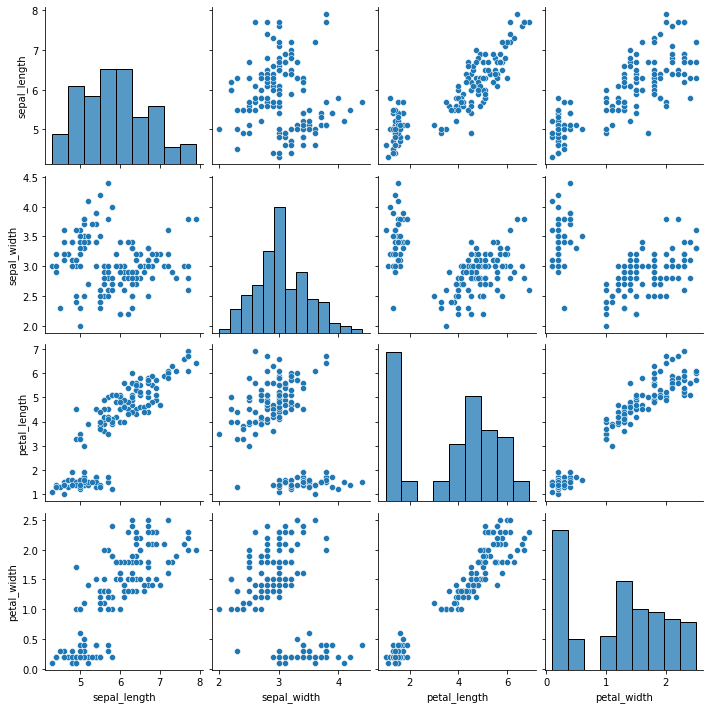

In [31]:
sns.pairplot(df)

## Chi-Square Test-
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

Whenever in a sample population having 2 categorical features, and we have to find out whether there is any association between them we need to use the Chi-Square Test.

 - step1: pick up the categorical columns as here they are 'sex' and 'smoker'.
 - step2: keep the values as observed values.
 - step3: get the expected values by using chi2_contingency() and store them in a variable.
 - step4: now on the basis of the difference between the observed and expected values we need to consider that both the categorical features are actually associated or not.

In [32]:
dataset=sns.load_dataset('tips')

In [33]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
## crosstab() is an inbuilt function, it will form a matrix between the factors.
## crosstab() = Compute a simple cross tabulation of two (or more) factors.

dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [35]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [36]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [37]:
## chi2_contingency() = it is in scipy.stats library.
## chi2_contingency() = This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table 'observed'.


val=stats.chi2_coingency(dataset_table)
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

 Here what we get in the array is:
 
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]])
 
 
 The chi2_coingency() tells that by seeing the particular sample population the expected value has to be this.
 
 But what we get as Observed Values is the information we get.

In [38]:
## storing the expected values

Expected_Values=val[3]

In [39]:
## no_of_rows = number of rows in the dataset_table, whereas the dataset_table is the crosstab() information.
## no_of_columns = number of columns in the dataset_table, whereas the dataset_table is the crosstab() information.
## ddof = Degree of Freedom

no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


<img src="https://cdn1.byjus.com/wp-content/uploads/2020/10/Chi-Square-Test.png"/>

In [40]:
## using the formula

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [41]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [42]:
## ppf = Percent point function (inverse of `cdf`) at any point q of the given Random Variable. The p value is the alpha.

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [43]:
## we can find out the association on the basis of that critical value.
## another way is by getting the p-value.

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [44]:
## This is by the critical value technique

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


In [45]:
## This is by the P-value technique

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. With categorical variable which has more than 2 categories then the test conducted will be called Anova Test.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

## One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not?

In [46]:
df1=sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df_anova = df1[['petal_width','species']]

In [48]:
grps = pd.unique(df_anova.species.values)

In [49]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [51]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [52]:
## f_oneway() = The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.  
## The test is applied to samples from two or more groups, possibly with differing sizes.

F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [53]:
print(p)

4.169445839443116e-85


In [54]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
